In [19]:
#pip install opencv-python 

<h2>Animal Classification - Improving Classification Performance</h2>

You are given an image classification datasets and template solution:

<ul>
<li>In the current implementation, <b>Grayscale pixel intensities</b> have been used as features trained on a logistic regression model</li>
    <li><b>Only two classes of animals</b> have been considered so far: Chickens and Cats</li>
</ul>




<b style="color:blue">You are tasked to do the following and improve the model performance:</b>

<ul>
    <li>Improve the F1 score using other models such as Neural Networks</li>
    <li>Use RGB features rather than Grayscale and compare performance</li>
    <li>Extend the problem to multiclass (16 classes)</li>
</ul>

<b style="color:blue;">1. Load the datasets and get the list of all animal classes</b>

In [20]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

folder_path = '..\..\datasets\\animals'
directories = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
animal_classes = directories #get the list all animal classes
print(animal_classes)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'PigHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [21]:
animal_classes = ['CatHead','ChickenHead']#

<b style="color:blue;">2. Display an animal of each class </b>

class: CatHead --> cat000852.jpg


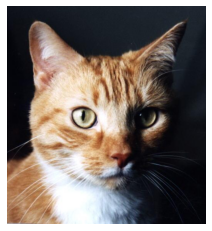

class: ChickenHead --> chickenside0001.jpg


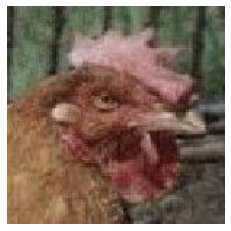

class: MonkeyHead --> monkeyfrontal0001.jpg


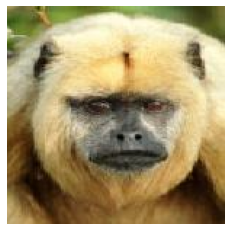

In [22]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import cv2
import numpy as np

Nc = len(animal_classes)
for class_name in animal_classes:
    folder_path_detail = '..\..\datasets\\animals\\'+str(class_name)
    for file_name in os.listdir(folder_path_detail):
        print('class:',class_name,'-->',file_name)
        file_path = folder_path_detail+"\\"+file_name
        image = cv2.imread(folder_path_detail+"\\"+file_name)  
        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        #plt.imshow(gray_image,cmap='gray')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        break

<b style="color:blue;">3. Create a dataframe of records based on the image data and the existing class labels</b>

<ol>
    <li>Convert every image to grayscale (black and white)</li>
    <li>Resize every image to the same size (40 x 40)</li>
    <li>Convert the image matrix into an array of pixel features</li>
    <li>Form your dataframe</li>
</ol>

In [23]:
import cv2
new_width = 30
new_height = 30

image_df = pd.DataFrame(columns=['image_name', 'image_class'] + [f'feat_{i}' for i in range(new_width*new_height)])

for class_name in animal_classes:
    folder_path_detail = '..\..\datasets\\animals\\'+str(class_name)
    for file_name in os.listdir(folder_path_detail):
        file_path = folder_path_detail+"\\"+file_name
        image = cv2.imread(folder_path_detail+"\\"+file_name)  
        #print(file_name)
        #print(image.shape)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resize_image = cv2.resize(gray_image,(new_width,new_height))
        pixels = resize_image.flatten()
        
        #image_df.loc[len(image_df)+1,['image_name','image_class']] = [file_name,class_name]
        image_df = image_df.append({
                'image_name': file_name,
                'image_class': class_name,
                **{f'feat_{i}': pixel for i, pixel in enumerate(pixels)}
            }, ignore_index=True)
image_df.head()

,image_name,image_class,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_890,feat_891,feat_892,feat_893,feat_894,feat_895,feat_896,feat_897,feat_898,feat_899
0,cat000852.jpg,CatHead,17,19,25,20,21,22,25,28,...,23,27,15,5,4,4,2,5,5,3
1,cat000908.jpg,CatHead,30,37,42,48,54,77,72,-124,...,27,53,72,65,77,74,68,63,60,53
2,cat000929.jpg,CatHead,34,37,39,41,47,51,55,65,...,45,31,120,66,109,98,107,116,69,68
3,cat000960.jpg,CatHead,4,4,3,3,3,3,4,4,...,113,107,75,120,123,122,124,115,109,106
4,cat000967.jpg,CatHead,27,35,45,45,38,34,46,-112,...,-80,-94,-94,-92,-98,-82,-76,-68,-53,-55


In [24]:
X = image_df.drop(columns=['image_name','image_class'])
y = image_df[['image_class']]

In [25]:
from sklearn.preprocessing import StandardScaler
#---Data Scaling
Sc = StandardScaler()
Sc.fit(X)
X_d = Sc.transform(X)
X_d = pd.DataFrame(X_d,columns=X.columns)

<b style="color:blue;">4. Split the Data into Training/Test set</b>

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_d,y,test_size=0.2,random_state=1234)

<b style="color:blue;">5. Model Building</b>

In [27]:
from sklearn.linear_model import LogisticRegression 

lg = LogisticRegression()
lg.fit(X_train,y_train) #train model

LogisticRegression()

In [28]:
from sklearn.neural_network import MLPClassifier #Multi layer Perceptron

max_epoch = 1000
ffn_clf = MLPClassifier(hidden_layer_sizes=(50,40,30),max_iter=max_epoch,
                  early_stopping=False,activation='relu',solver='lbfgs')#feedforward neural network classifier

ffn_clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 40, 30), max_iter=1000, solver='lbfgs')

<b style="color:blue;">6. Model Evaluation</b>

In [29]:
from sklearn.metrics import classification_report

y_pred_test = lg.predict(X_test)

print("Logistic Regression - Test Performance: \n",classification_report(y_test,y_pred_test))

Logistic Regression - Test Performance: 
               precision    recall  f1-score   support

     CatHead       0.77      0.66      0.71        35
 ChickenHead       0.47      0.36      0.41        22
  MonkeyHead       0.40      0.67      0.50        15

    accuracy                           0.57        72
   macro avg       0.55      0.56      0.54        72
weighted avg       0.60      0.57      0.57        72



In [30]:
y_pred_test_ann = ffn_clf.predict(X_test)

print("ANN - Test Performance: \n",classification_report(y_test,y_pred_test_ann))

ANN - Test Performance: 
               precision    recall  f1-score   support

     CatHead       0.74      0.71      0.72        35
 ChickenHead       0.53      0.45      0.49        22
  MonkeyHead       0.47      0.60      0.53        15

    accuracy                           0.61        72
   macro avg       0.58      0.59      0.58        72
weighted avg       0.62      0.61      0.61        72



<b style="color:blue;">7. Image Test</b>

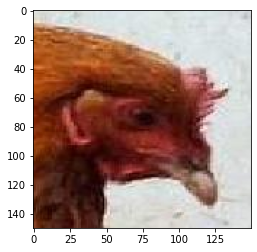

In [31]:
test_image = 'chickenside0016.jpg' # cat537a.jpg cat547b.jpg cat893a.jpg chickenside0015.jpg chickenside0016.jpg chickenside0014.jpg
image = cv2.imread(test_image)  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resize_image = cv2.resize(gray_image,(new_width,new_height))
pixels = resize_image.flatten()

In [32]:
test_image_df = pd.DataFrame(columns= [f'feat_{i}' for i in range(new_width*new_height)])
test_image_df = test_image_df.append({
                **{f'feat_{i}': pixel for i, pixel in enumerate(pixels)}
            }, ignore_index=True)
test_image_df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_890,feat_891,feat_892,feat_893,feat_894,feat_895,feat_896,feat_897,feat_898,feat_899
0,-36,-45,-37,-27,-31,-31,-47,-33,-34,-33,...,-38,-38,-37,-38,-36,-46,-75,-38,-34,-30


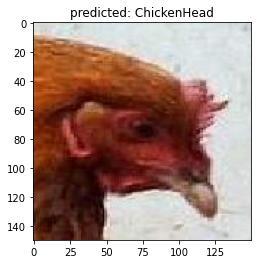

In [33]:
input_data = test_image_df.iloc[[0],:]
input_data = Sc.transform(input_data)
class_predicted = lg.predict(input_data)

plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('predicted: %s'%class_predicted[0])
plt.show()